In [93]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<Figure size 432x288 with 0 Axes>

<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_portada.PNG" align="center" width="70%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 4</div>
            <div class="div-contenido">Clustering</div>
        </div>
    </div>
</div>

### Agenda

---

- Aprendizaje no supervisado. Clustering

- K-means

- Clustering Jerárquico

- DBScan


<div class="div-dhds-fondo-1"> Aprendizaje no supervisado - Clustering 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Aprendizaje no supervisado

---

Recordemos:

¿Cuál es la principal diferencia entre los problemas de *aprendizaje supervisado* y *aprendizaje no supervisado*?

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_001_no_supervisado.png" alt="no_supervisado" width=60% height=45% />

- En el Aprendizaje no supervisado solamente disponemos de la matriz de features X;  **no hay una variable target** contra la cual evaluar los resultados.

    El objetivo consiste en encontrar regularidades en los datos que nos permitan agruparlos por su similaridad.

### Aprendizaje no supervisado

---

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_002_clustering.png" alt="clustering" width=60% height=40% />

Dentro del aprendizaje supervisado tenemos dos grandes grupos de algoritmos:

- **Clustering**. Es el proceso de organizar los objetos en grupos cuyos miembros son similares y los grupos distintos entre sí. 

   Llamamos **cluster** a la colección de datos similares entre ellos.   
   
- *Reducción de dimensionalidad*. Transforman los datos con alta dimensionalidad, a una representación con menos features que resume las características principales del dataset.

    Lo veremos en detalle en otra clase.

¿Cuál es la diferencia entre Clasificación y Clustering? Ya que ambos crean grupos.

- En la clasificación, estamos agrupando los datos de acuerdo *con un conjunto de grupos predefinidos por la clase*. (Supervisado)

- En clustering agrupamos los datos con características similares. En otras palabras, tenemos que descubrir las propias clases. (No Supervisado)

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_003_clustering_class.PNG" alt="clustering_class" width=60% height=45% />

Posibles aplicaciones del clustering:

- *Marketing*: grupos de clientes con comportamiento similar.

- *Biología*: clasificación de plantas y animales.

- *Urbanismo*: identificación de grupos de casas según su tipo de vivienda, valor y ubicación geográfica.

- *Textos*: Agrupar documentos que pertenecen a temas similares.

- Búsqueda de outliers, valores atípicos.

- Hacer un modelo exploratorio de los datos antes de realizar un modelo de clasificación.

### Clustering

---

Como el objetivo del clustering es encontrar grupos de datos similares entre sí, los resultados dependen de *cómo medimos dicha similaridad*. 

- En clustering, **la distancia** es la medida más común. La usamos en los *algoritmos K-means y Clustering Jerárquico*.

- Otra forma de agrupar es determinando *como se distribuyen las observaciones en el espacio de dimensiones*. Lo llamamos **estimación de la densidad**. Lo usaremos en el *algoritmo DBSCAN*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_004_kmeans_dbscan.PNG" alt="kmeans_dbscan" width=60% height=45% />

En los algoritmos basados en distancia, se deben agrupar las observaciones tales que:

- las distancias **internas** deberían ser pequeñas. *Dentro del cluster*.

- las distancias **externas** deberían ser grandes. *Entre los clusters*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_005_distancia.png" alt="distancia" width=60% height=45% />

<div class="div-dhds-fondo-1"> K-means
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### K-means

---

K-means es uno de los algoritmos más conocidos para identificar clusters, por su simplicidad y eficiencia. 

- *Simplicidad*: fácil de entender y de implementar.

- *Eficiencia*: la complejidad en tiempo de cómputo es *O(tkn)*, donde n es el tamaño de la muestra, k el número de clusters y t es el número de iteraciones. Como k y t son pequeños valores, se considera un *algoritmo lineal*.

<p style="color:red;font-size:15px">Importante:</p>

- <p style="color:red;font-size:30px">El número de clusters K es fijado a priori.</p>

- <p style="color:blue;font-size:30px">Los clusters son disjuntos.</p>

### K-means

---

El criterio para agrupar los datos es por su cercanía a ciertos puntos en el espacio llamados centroides.  

Veamos una representación:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_006_iterations.webp" alt="iterations" width=50% height=40% />

En su versión más simple, el algoritmo funciona así:

1. Se eligen al azar los k puntos en el espacio, **los centroides**. 

2. Se asocia cada punto u observación con el número de centroide **más cercano**, definiendo así *k-clusters*.

3. Se redefinen los centroides como **los centros geométricos de los puntos dentro de cada cluster**. Dicho de otra forma, la posición nueva de cada centroide es el promedio de las posiciones de los puntos asignados al cluster.

4. Se repiten los pasos 2-3 *hasta que el algoritmo converge*, es decir, hasta que la composición de los clusters no cambia, o llegue al límite de las iteraciones.

### K-means

---

El algoritmo tiene como objetivo minimizar la función objetivo:

\begin{equation}
J=\sum_{j=1}^k \sum_{\vec{x} \in S_j} \vert\vert \vec{x} - \vec{c}_j \vert\vert^2
\end{equation}

en donde $\vec{c}_j$ es el centroide del cluster $S_j$.

Se busca minimizar la función J que es *la suma de las distancias al cuadrado de los puntos al centroide de su cluster*. 

K-means no necesariamente selecciona el mínimo de la función objetivo, ya que es sensible a la *selección inicial de los centroides*.

###  Dataset

---
Para ejemplificar los conceptos, vamos a intentar agrupar a las provincias argentinas.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_007_argentina.png" alt="argentina" width=30% height=45% />

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Para cada provincia argentina, tenemos datos de los contribuyentes. Por ejemplo, recaudación total, cantidad de contribuyentes, total de contribuyentes por actividad económica, etc.

In [95]:
df = pd.read_csv('../Data/provincias_actividad.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])

Filas: 24 Columnas: 16


In [96]:
df.head(3)

,Jurisdiccion,Descripcion,Hab_km2,RecaCM,TotalContribCM,CoParticipacion,Cereales,Oleaginosas,Bovino,Construccion,Venta_Mayor,Venta_menor_prendas,Transporte merc_ granel,Transporte_carga,Seguros,Inmobiliarios
0,901,Capital_Federal,14450.8,15479936868,396727,4219793357,7876,3056,10482,20980,12578,6500,3039,19555,7822,19516
1,902,Buenos_Aires,50.8,11448441128,415396,37700278142,10256,4131,11978,21450,13480,6720,7046,24834,7928,19508
2,903,Catamarca,3.6,166109956,15051,4724629477,382,318,311,615,1860,234,611,1293,213,1090


###  K-means

---

Recordemos que al utilizar distancias para calcular los clusters, es conveniente *estandarizar las variables previamente*.

In [97]:
X = df.drop(df.columns[[0, 1]], axis=1) # Eliminamos variables de texto

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [98]:
np.set_printoptions(suppress=True)
[X_scaled[i] for i in range(2)]

[array([ 4.79576116,  3.7248256 ,  3.18255718, -0.44616555,  2.1038175 ,
         1.68096434,  2.76515225,  3.26306408,  3.00195067,  3.23973257,
         0.39818925,  2.61280524,  3.24493909,  3.23804032]),
 array([-0.19564853,  2.60827336,  3.35934112,  4.24772459,  2.95440432,
         2.55834407,  3.25633115,  3.34688635,  3.29907947,  3.36644023,
         2.02008948,  3.5269072 ,  3.29635047,  3.23643104])]

###  K-means

---

Al instanciar el método, le indicamos dos hiperparámetros:

- **n_clusters**: la cantidad de clusters que vamos a generar.

- *n_init*: número máximo de iteraciones. Puede terminar antes.

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,n_init=10,random_state=0) # Numero de repeticiones=10

Ajustamos el modelo a los datos estandarizados.

In [100]:
kmeans.fit(X_scaled)

KMeans(n_clusters=7, random_state=0)

Obtenemos parámetros del modelo:

* *labels_* : vector con la asignación del cluster a cada observación.
* *cluster\_centers\_* : Coordenadas de los centroides.

In [101]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

Observamos que dejó solas a las provincias de Capital Federal (3) y Buenos Aires (1), las dos con valores mayores. 

Luego agrupo a Santa Fe y Cordoba (2), las que le siguen en valores. A continuación agrupa a las restantes provincias.

In [102]:
#concatenamos Descripcion con el cluster asignado a cada registro
frames = [df['Descripcion'],pd.DataFrame(labels, columns=['Cluster'])]
result = pd.concat(frames, axis=1)
#cambiamos el nombre de columna de Descripcion a Provincia
clusters = result.rename(columns={'Descripcion':'Provincia'})

#miramos que provinicas fueron asignadas a los clusters 1 2 y 3
clusters.loc[clusters.Cluster.isin([1,2,3])].sort_values("Cluster")

,Provincia,Cluster
1,Buenos_Aires,1
3,Cordoba,2
20,Santa_Fe,2
0,Capital_Federal,3


In [103]:
# vemos cuántas provincias hay asignadas a cada cluster
clusters.loc[clusters.Cluster.isin([0,4,5,6])].groupby("Cluster").count()

,Provincia
Cluster,
0,3
4,10
5,2
6,5


In [104]:
#miramos que provinicas fueron asignadas a los clusters 0 4 5 6
clusters.loc[clusters.Cluster.isin([0,4,5,6])].sort_values("Cluster")

,Provincia,Cluster
12,Mendoza,0
4,Corrientes,0
15,Rio_Negro,0
19,Santa_Cruz,4
17,San_Juan,4
14,Neuquen,4
13,Misiones,4
22,Tierra_del_Fuego,4
2,Catamarca,4
9,Jujuy,4


###  Regla del codo

---

Como evaluamos si el valor K cantidad de clusters es el óptimo?

Habiamos visto que K-means busca minimizar *la suma de las distancias al cuadrado de los puntos al centroide de su cluster*. 

Calculamos el valor de la función para distintos K. Usamos el atributo *'inertia_'*.

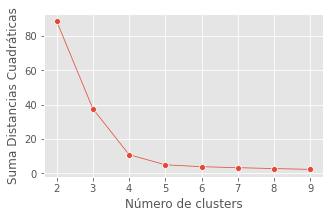

In [105]:
sq_distances=[]; k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

plt.figure(figsize=(5,3)); sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');    

Observamos que a medida que aumenta el número de clusters, la suma de distancias cuadráticas se achica. 

Evidentemente, si k fuera igual a n, habría un centroide para cada punto y las distancias serían todas iguales a cero.

Pero podemos aplicar un criterio para elegir el k mirando este gráfico. Lo llamamos **la regla del codo** (Elbow method).

Se elige el k **a partir del cual la curva se aplana**, *"donde se encuentra el codo"*.

En nuestro ejemplo, $K = 4$ es una buena opción.

### Silhouette score

---

El **coeficiente Silhouette** mide cuán cercano es un punto al resto de los que están *en su mismo cluster*, en relación a cuán cercano es a los puntos *del cluster más próximo*. 

Es decir que para cada punto $i$, se tiene un coeficiente $s_i$

$$
s_i=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}
$$

en donde $a(i)$ es la distancia promedio a los otros puntos del mismo cluster y $b(i)$ es la distancia promedio a todos los puntos del cluster vecino más cercano. De esta manera

$$
-1\le s_i \le 1
$$

- Si $s$ es cercano a 1, significa que el punto $i$ está correctamente etiquetado

- $s$ cercano a cero indica que estaría igual de bien (o mal) etiquetarlo con el cluster vecino más cercano

- $s$ cercano a -1 significa que el punto $i$ está mal etiquetado y pertenece al cluster vecino.

Para obtener un score del clustering promediamos los coeficientes:

$$
S(C)=\frac{1}{k}\sum_{j=1}^k \bar{s}_j
$$

en donde $\bar{s}_j$ es el coeficiente promedio de todos los puntos dentro del cluster j-ésimo.

Graficamos el score en función de k; el valor óptimo está entre k= 2 y 4.

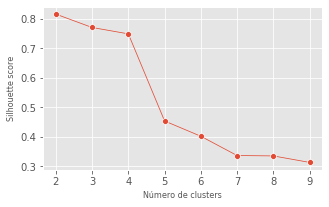

In [106]:
from sklearn.metrics import silhouette_score,silhouette_samples
sil=[]; k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled); score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

plt.figure(figsize=(5,3));sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=8);plt.xlabel('Número de clusters',fontsize=8);

#### Calinski-Harabasz score

---

Mide la relación entre la *dispersión inter-clusters* y la *dispersión intra-clusters*. 

Una estructura de clusters bien definidos tiene una *alta dispersión entre clusters diferentes* y *baja dispersión dentro de cada cluster*. 

Se define:

$$
s(k)=\frac{Tr(B_k)}{Tr(W_k)}\frac{N-k}{k-1}
$$

en donde $Tr(B_k)$ y $Tr(W_k)$ son las trazas de las matrices de dispersión entre clusters $B_k$ e intra clusters $Tr(W_k)$.


El factor $\frac{Tr(B_k)}{Tr(W_k)}$ tiende a aumentar con el número de clusters, puesto que al aumentar k estamos generando clusters más chicos y por ende menos dispersos. 

El segundo factor $\frac{N-k}{k-1}$ busca controlar este efecto: tiende a cero cuando k tiende a N. 

Calculamos el score para distintos valores de K. 

Dependiendo de la estructura de los datos puede aparecer:

- Un *pico bien definido* que nos permita elegir el k.
- Sino, se usa la *regla del codo*.

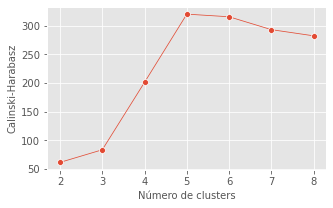

In [107]:
from sklearn.metrics import calinski_harabasz_score
k_values=range(2,9); ch_scores=[]

for k in k_values:  
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=calinski_harabasz_score(X_scaled,kmeans.labels_)
    ch_scores.append(score)

plt.figure(figsize=(5,3));
sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=10);plt.xlabel('Número de clusters',fontsize=10);

### K-means - resumen

---
- Requiere definir el valor de K a priori.

- Los clusters son disjuntos.

- Como empieza con una asignación de clusters aleatoria *los resultados pueden variar*. 

   Se puede mejorar haciendo *varias corridas* y seleccionar el que resulte con menor costo.
   
- Se basa en la hipótesis de que los clusters tienen una geometría esférica, y por eso busca minimizar la distancia euclídea (al cuadrado). 

   Si los clusters tuvieran *otra geometría* tal vez no los identifique.

- K-means es **sensible a outliers**. Como todos los puntos se asignan a algún cluster, la presencia de outliers en los datos puede sesgar la estimación de los centroides, afectando el resultado final. 

   En general conviene aislarlos previamente; otras veces forman un cluster y nos ayudan con el análisis de los datos. 


<div class="div-dhds-fondo-1"> Clustering Jerárquico
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Clustering Jerárquico

---

Distinto a K-means, **Clustering Jerárquico** comienza asignando todos los puntos a su *propio cluster*. Es decir que cada punto es un cluster. 

Se los llama *aglomerativos o bottom up*.

Como dice su nombre, construye **una jerarquía** en cada paso, combinando los dos puntos más cercanos en un único cluster.

Finaliza con *todos los puntos en un único cluster*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_008_jerarquico.PNG" alt="jerarquico" width=60% height=45% />

### Clustering Jerárquico

---

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_009_dendograma.PNG" alt="dendograma" width=35% height=25% />

La visualización de los clusters en forma de árbol se llama **dendograma**. Es muy útil para determinar el número de clusters más apropiado. 

- La línea punteada horizontal corta a *cuatro líneas verticales*. Indica que seleccionamos *cuatro clusters*.

- Moviendo la línea hacia arriba o hacia abajo, determinamos los K clusters seleccionados.

Por lo tanto, este algoritmo **no requiere determinar el número K de clusters a priori**.

### Clustering Jerárquico
 
---
Para la construcción del clustering jerárquico necesitamos dos elementos:

- Una *medida de distancia*, al igual que con k-means, para determinar la cercanía.

- Un criterio para fusionar los clusters. Por ejemplo, medir la distancia entre ellos y seleccionar los más cercanos. 

   A este criterio se lo llama **linkage**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_010_linkage.png" alt="linkage" width=80% height=75% />


<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_011_linkage.png" alt="linkage" width=80% height=60% />

* <b>Ward</b> es la opción por default. Tiende a generar *clusters de dimensiones similares* y funciona bien en la mayoría de los casos.

* Si tenemos clusters con *diferentes cantidad de miembros*, <b>Complete</b> y <b>Average</b> son buenas opciones.

* <b>Single linkage</b> tiende a generar clusters extendidos en los que las hojas se van agregando de a una.

### Ejemplo

---

Vamos a generar clusters sobre un dataset de automoviles.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_012_autos.jpg" alt="autos" width=45% height=25% />

In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

In [109]:
df = pd.read_csv('../Data/automobile.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])

Filas: 199 Columnas: 19


In [110]:
df.sample(3)

,make,fuel_type,num_of_doors,body_style,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
179,volkswagen,gas,four,sedan,97.3,171.7,65.5,55.7,2212,four,109,3.19,3.40,9.0,85,5250,27,34,8195
87,nissan,gas,two,sedan,94.5,165.3,63.8,54.5,1918,four,97,3.15,3.29,9.4,69,5200,31,37,6649
90,nissan,gas,two,sedan,94.5,165.3,63.8,54.5,1951,four,97,3.15,3.29,9.4,69,5200,31,37,7299


Seleccionamos algunas features, y las *estandarizamos*.

In [111]:
columns = ['wheel_base','length','width','height','horsepower','highway_mpg','price']
X = df[columns]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

###  Scipy

---
Para implementar el modelo usamos el método **linkage** de la *librería scipy*, que no tiene los métodos "fit" y "predict" clásicos de sklearn. 

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
Z = linkage(X_scaled, 'ward'); # ward indica el tipo de linkage

Linkage devuelva una matriz **Z** de (n-1) filas y 4 columnas. 

- En cada fila i, **iteración i-ésima**, las dos primeras columnas indican los clusters que se combinan, y forman el nuevo cluster **n + i**. 
    
    Un cluster con un número menor a **n** corresponde a una de las **n** observaciones originales. 
- La tercera columna indica la *distancia entre los clusters*.
- La cuarta es *el número de observaciones* en el cluster que se está formando.

In [113]:
len(Z) # n

198

In [114]:
Z[:10,:] # primeras diez iteraciones

array([[ 23.        , 115.        ,   0.        ,   2.        ],
       [ 83.        ,  84.        ,   0.        ,   2.        ],
       [ 24.        , 116.        ,   0.        ,   2.        ],
       [ 21.        , 114.        ,   0.        ,   2.        ],
       [ 28.        , 119.        ,   0.        ,   2.        ],
       [174.        , 175.        ,   0.00742738,   2.        ],
       [ 12.        ,  13.        ,   0.0167116 ,   2.        ],
       [ 78.        , 120.        ,   0.0167116 ,   2.        ],
       [145.        , 146.        ,   0.01856844,   2.        ],
       [157.        , 158.        ,   0.02228213,   2.        ]])

In [115]:
Z[195:,:] # últimas tres iteraciones

array([[390.        , 392.        ,  15.25361793, 130.        ],
       [391.        , 393.        ,  17.56016162,  69.        ],
       [394.        , 395.        ,  34.7237213 , 199.        ]])

###  Scipy

---
Con el método **dendogram** graficamos el dendograma a partir del array Z. 

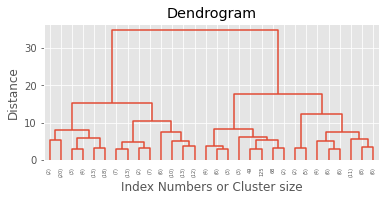

In [116]:
plt.figure(figsize=[6,2.5]); 
plt.title('Dendrogram'); 
plt.xlabel('Index Numbers or Cluster size'); 
plt.ylabel('Distance')

dendrogram(Z,
           leaf_rotation=90., leaf_font_size=5.,  
           color_threshold=0, truncate_mode='lastp' )
plt.show()

###  Scipy

---
Para identificar clusters en el dendrograma debemos definir una distancia de **corte en el eje horizontal**; cada rama independiente del árbol es un cluster. 

Por ejemplo cortando el árbol a una altura de distancia=8 generamos *8 clusters*.

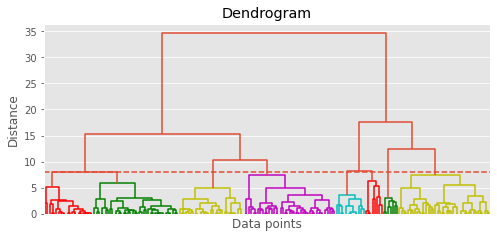

In [117]:
from scipy.cluster import hierarchy 

plt.figure(figsize=[8,3.5]); plt.title('Dendrogram'); plt.xlabel('Data points'); plt.ylabel('Distance')

color_palette=['r','g','y','m','c'];
hierarchy.set_link_color_palette(color_palette) 

dendrogram(Z, leaf_rotation=90., leaf_font_size=5., color_threshold=8, )

plt.hlines(8,0,2000,linestyle='--'); plt.xticks([]); plt.show()

Para ver las observaciones de cada cluster usamos el método `fcluster`. 

In [118]:
labels=fcluster(Z,8,criterion='maxclust');

Veamos el total de automoviles agrupados por cluster.

In [119]:
frames = [df['make'],df['body_style'],pd.DataFrame(labels, columns=['Cluster'])]
result = pd.concat(frames,axis=1)
clusters = result.rename(columns={'make':'Modelo'})
#clusters.loc[clusters['Cluster'].isin([4])].sort_values("Cluster")
clusters.groupby("Cluster")['Modelo'].count()

Cluster
1    22
2    38
3    29
4    41
5    13
6     8
7     7
8    41
Name: Modelo, dtype: int64

Veamos el detalle de automoviles para dos clusters.

In [120]:
clusters.loc[clusters['Cluster'].isin([6,7])].sort_values("Cluster")

,Modelo,body_style,Cluster
15,bmw,sedan,6
16,bmw,sedan,6
49,jaguar,sedan,6
68,mercedes-benz,convertible,6
122,porsche,hardtop,6
123,porsche,hardtop,6
124,porsche,convertible,6
125,porsche,hatchback,6
17,bmw,sedan,7
47,jaguar,sedan,7


### Coeficiente Cofenético

---

Este coeficiente compara *las distancias originales* entre las observaciones, con las *distancias que tienen los clusters a los que pertenecen*.

Un coeficiente cercano a uno es ideal; indica que las dos distancias están muy correlacionadas.

$$
c=\frac{\sum_{i<j} (x(i,j)-\bar{x})(t_{i,j}-\bar{t})}
{\sqrt{\sum_{i<j} (x(i,j)-\bar{x})^2 \sum_{i<j} (t(i,j)-\bar{t})^2}}
$$

en donde $x(i,j)$ es la distancia entre los puntos i-j y $t(i,j)$ es la distancia entre los clusters que contenían al punto i y al punto j al momento de unirse.

El coeficiente cofenético de nuestro modelo usando linkage Ward es:

In [121]:
c,dists=cophenet(Z, pdist(X_scaled))
print('Cophenetic coefficient:',c)

Cophenetic coefficient: 0.6399094729176885


###  Comparando linkage

---
Comparemos los distintos tipos de linkage y su coeficiente cofenético:

In [122]:
def plot_dendrogram(X_sc,method,ax):
    Z = linkage(X_sc, method);
    c,dists=cophenet(Z, pdist(X_sc));
    ax.set_title(method+' c='+str(np.around(c,2)))        
    ax.set_xticklabels([])
    dendrogram(Z, leaf_rotation=90., leaf_font_size=5.,  
              color_threshold=0, truncate_mode='lastp', ax=ax)        
    return  

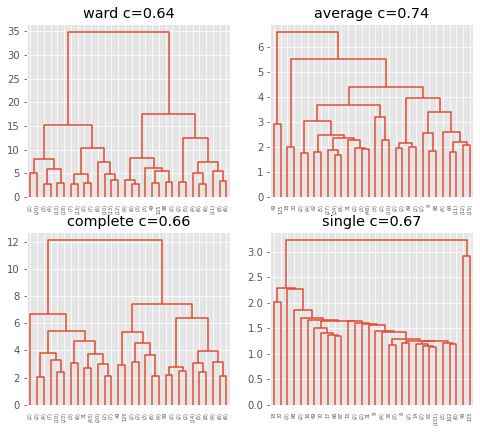

In [123]:
fig,axes=plt.subplots(2,2,figsize=(8,7))
plot_dendrogram(X_scaled,'ward',axes[0,0])
plot_dendrogram(X_scaled,'average',axes[0,1])
plot_dendrogram(X_scaled,'complete',axes[1,0])
plot_dendrogram(X_scaled,'single',axes[1,1])
plt.show()

### Cluster jerárquico - resumen

---

- No es necesario definir a priori la cantidad de clusters.

- Ofrece una representación gráfica (dendrograma) del proceso de generación de clusters.

- Existen varios métodos para unir los clusters (linkage).

- Es más costoso computacionalmente que K-Means.

- También puede fallar cuando los clusters no tienen una geometría esférica.

<div class="div-dhds-fondo-1"> DBSCAN
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### DBSCAN

---

**Dbscan** (Density Based Spatial Clustering of Applications with Noise), como su nombre lo indica, identifica clusters como *regiones de alta densidad de puntos*. 

El algoritmo tiene dos hiperparámetros: 

- *epsilon*: máxima distancia entre dos puntos para considerarlos pertenecientes al mismo cluster (similar al concepto de “cercanía”).

- *min_points*: mínimo número de puntos necesarios para formar un cluster (para evitar la formación de clusters demasiado pequeños).

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_31_Clustering/Presentacion/img/M4_CLASE_31_014_dbscan_parametro.png" alt="dbscan" width=45% height=30% />

Se definen tres tipos de puntos:

* **Core**: puntos que tienen al menos *min-points* vecinos dentro de un *radio Eps*. Son puntos de *alta densidad*.

* **Border**: puntos que están dentro del radio de un punto core, pero no cumplen la condición de core. Son las *fronteras de los clusters*.

* **Noise**: puntos que no cumplen la condición de *core ni de border*. Son *outliers o ruido*, y no pertenecen a ningún cluster.

### DBSCAN

---
La idea principal es que un punto pertenece a un cluster si está cerca de muchos puntos de ese cluster.

El algoritmo básico es:

1. Se selecciona un punto al azar, y se determina su vecindario usando el *radio epsilon*. 

2. Si tiene al menos *min_points* vecinos, se lo marca como *core*, y se crea un cluster digamos  "A". En caso contrario, se lo marca como *noise*.

3. Todos los puntos vecinos del *core* son asignados al cluster "A".

4. Si algunos de estos puntos son *core*, los puntos que tiene como vecinos se incorporan al cluster "A", si ya no fueron seleccionados.

5. Se selecciona un punto nuevo no procesado, y se repiten los pasos.

6. El proceso finaliza cuando se visitaron todos los puntos.

Nota: Un punto marcado como *noise* puede ser revisado.

### Ejemplo

---
Creamos un dataset con el método `make_moons`.

In [124]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
plt.style.use('ggplot')
%matplotlib inline

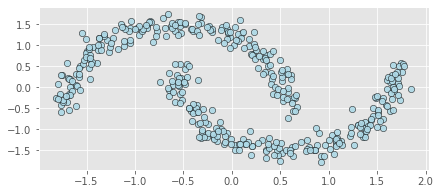

In [125]:
from sklearn.datasets import make_moons
X, label = make_moons(n_samples=400, noise=0.07, random_state=19)
X= StandardScaler().fit_transform(X)

fig, ax = plt.subplots(figsize=(7,3))
sctr = ax.scatter(X[:,0],X[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9, cmap=plt.cm.Set1)

### Ejemplo

---
El método `DBSCAN` implementa el modelo. Y tiene un método `fit_predict` para calcular los clusters sobre los datos.

In [126]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

Vamos a graficar los dos clusters y los outliers.

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

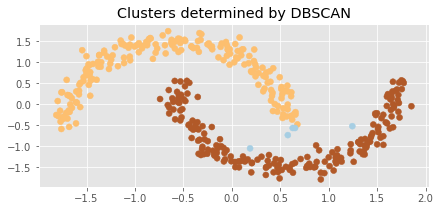

In [127]:
plt.figure(figsize=(7,3))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Similar a los otros modelos de clusters, podemos acceder al número de cluster de cada observación con la función `labels_`.

En DBSCAN, los puntos marcados con $-1$ son outliers.

In [128]:
dbscan.labels_[dbscan.labels_ == -1].size

5

### Parámetros

---
Si conocemos del dominio de los datos, `epsilon` es una distancia típica con sentido físico y `minPts` es el tamaño mínimo para los clusters. 

Si no, existen algunas heurísticas para determinar los valores:

* <b>minPts:</b> Una regla de pulgar es asignar este parámetro en función del número de dimensiones $D$ en el dataset.
    
    En general se elige <b>minPts=2D</b>, pero puede ser un valor mayor para datasets muy grandes, ruidosos o con datos duplicados.

* <b>epsilon</b> Se puede determinar mirando un gráfico de distancias al k-ésimo vecino, con `k=minPts-1`. Se calcula la distancia al k-ésimo vecino más cercano de cada punto y luego se grafican estas distancias de mayor a menor. 

    Una buena elección de `epsilon` es el codo o punto de quiebre de la curva.

Para conocer más: <a href="https://en.wikipedia.org/wiki/DBSCAN#Parameter_estimation" target="_blank">Referencia</a>

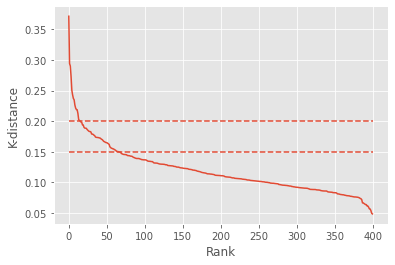

In [129]:
from scipy.spatial.distance import pdist,squareform
minPts=5; k=minPts-1;
D=squareform(pdist(X));
k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
    
k_distances=np.sort(k_distances); k_distances=k_distances[::-1];
    
plt.plot(k_distances); plt.xlabel('Rank'); plt.ylabel('K-distance');
plt.hlines([0.2,0.15],0,400,linestyles='dashed');

Una elección de $\epsilon$ entre 0.15 y 0.20 parece ser apropiada.

### DBSCAN - resumen

---

- Funciona muy bien en clusters con límites no lineales y de tamaños muy diferentes.

- No requiere la definición de un número de clusters a priori.

- Incorpora el concepto de **ruido**, lo que lo hace robusto a *outliers*.

- En datasets con zonas de densidades muy diferentes puede no trabajar adecuadamente, ya que no funciona correctamente con el mismo *epsilon* y *min_points*.

- Si no se conocen bien los datos y su escala puede ser dificil determinar $\epsilon$.

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

Usando otros atributos del dataset de automoviles:

- Buscamos el mejor K con *Score Silhouette*.

- Generamos los K clusters con *K-means*.

- Generamos los K clusters con *Cluster Jerárquico*.

- Generamos el dendograma.

- Comparamos ambos modelos usando una matriz de k filas y k columnas, donde el elemento (i, j) corresponde a la cantidad de registros etiquetados con i por *K-means* y con j por *Cluster Jerárquico*. (Es algo parecido a la matriz de confusión que usamos en problemas de clasificación con métodos supervisados.)

In [130]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Archivo

----

In [131]:
df = pd.read_csv('../Data/automobile.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])

Filas: 199 Columnas: 19


In [132]:
df.sample(3)

,make,fuel_type,num_of_doors,body_style,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
2,alfa-romeo,gas,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
122,porsche,gas,two,hardtop,89.5,168.9,65.0,51.6,2756,six,194,3.74,2.90,9.5,207,5900,17,25,32528
11,bmw,gas,four,sedan,101.2,176.8,64.8,54.3,2395,four,108,3.50,2.80,8.8,101,5800,23,29,16925


Seleccionamos algunas features, y las *estandarizamos*.

In [133]:
from sklearn.preprocessing import StandardScaler
columns = ['curb_weight','length','width','height','city_mpg']
X = df[columns]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### K-means

----

Graficamos el score Silhouette *para K entre 2 y 10*, y determinamos que el valor óptimo es *K=3*.

In [134]:
from sklearn.metrics import silhouette_score,silhouette_samples
sil=[]; k_values=range(2,10);

#for ...
#plt.figure...
#plt.ylabel('Silhouette score',fontsize=8);plt.xlabel('Número de clusters',fontsize=8);

Creamos los clusters con K-means para *K=3*.

In [135]:
from sklearn.cluster import KMeans
#kmeans=KMeans...
#kmeans.fit(X_scaled)

Obtenemos el parámetro `labels_`, el vector con la asignación del cluster a cada observación.

In [136]:
labels_kmeans = kmeans.labels_ 

### Cluster Jerárquico

----

Creamos los clusters con Cluster Jerárquico para *K=3*. Usamos el linkage *ward*.

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
#Z = linkage...

Para ver las observaciones de cada cluster usamos el método `fcluster`. 

In [138]:
labels_jerarquico = fcluster(Z,3,criterion='maxclust');

Truco para igualar la numeración entre ambos modelos

In [139]:
labels_jerarquico = np.where(labels_jerarquico==2, 0, labels_jerarquico)
labels_jerarquico = np.where(labels_jerarquico==3, 2, labels_jerarquico)

In [140]:
labels_kmeans

array([3, 1, 0, 2, 5, 6, 0, 6, 0, 0, 5, 0, 7, 0, 7, 7, 6, 0, 5, 0, 2, 4,
       0, 6], dtype=int32)

In [141]:
labels_jerarquico

array([1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

### Dendograma

----

Generamos el dendograma.

Text(0, 0.5, 'Distance')

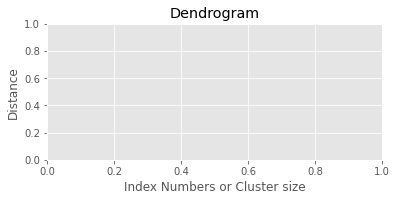

In [142]:
plt.figure(figsize=[6,2.5]); plt.title('Dendrogram'); plt.xlabel('Index Numbers or Cluster size');plt.ylabel('Distance')

#dendrogram(...
#plt.show()

### Matriz de comparación entre algoritmos de clustering

----

Podemos usar el método `confusion_matrix` de `scikit-learn` para construir esta matriz tomando los valores de los clusters predichos por k-means **como si fueran** los verdaderos valores de las etiquetas, y los valores de los clusters predichos por el clustering jerarquico **como si fueran** los predichos.

Pero no pierdan de vista que ésta no es la matriz de confusión que conocemos (porque este no es un problema de aprendizaje supervisado) aunque este método sirva para construir la matriz que compara los algoritmos de clustering.

In [143]:
from sklearn.metrics import confusion_matrix
#confusion_cluster = confusion_matrix(...,...)
#print('K-means vs Jerárquico\n',confusion_cluster)

### Solución

---

### Ejercicio

----

Usando otros atributos del dataset de automoviles:

- Buscamos el mejor K con *Score Silhouette*.

- Generamos los K clusters con *K-means*.

- Generamos los K clusters con *Cluster Jerárquico*.

- Generamos el dendograma.

- Comparamos ambos modelos usando una matriz de k filas y k columnas, donde el elemento (i, j) corresponde a la cantidad de registros etiquetados con i por *K-means* y con j por *Cluster Jerárquico*. (Es algo parecido a la matriz de confusión que usamos en problemas de clasificación con métodos supervisados.)

In [144]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Archivo

----

In [145]:
df = pd.read_csv('../Data/automobile.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])

Filas: 199 Columnas: 19


In [146]:
df.sample(3)

,make,fuel_type,num_of_doors,body_style,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
49,jaguar,gas,two,sedan,102.0,191.7,70.6,47.8,3950,twelve,326,3.54,2.76,11.5,262,5000,13,17,36000
33,honda,gas,two,hatchback,93.7,150.0,64.0,52.6,1940,four,92,2.91,3.41,9.2,76,6000,30,34,6529
61,mazda,gas,four,sedan,104.9,175.0,66.1,54.4,2670,four,140,3.76,3.16,8.0,120,5000,19,27,18280


Seleccionamos algunas features, y las *estandarizamos*.

In [147]:
from sklearn.preprocessing import StandardScaler
columns = ['curb_weight','length','width','height','city_mpg']
X = df[columns]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### K-means

----

Graficamos el score Silhouette *para K entre 2 y 10*, y determinamos que el valor óptimo es *K=3*.

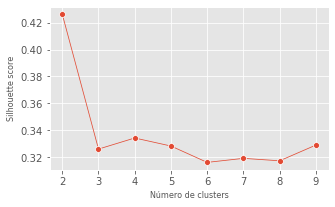

In [148]:
from sklearn.metrics import silhouette_score,silhouette_samples
sil=[]; k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled); score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

plt.figure(figsize=(5,3));sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=8);plt.xlabel('Número de clusters',fontsize=8);

Creamos los clusters con K-means para *K=3*.

In [149]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

Obtenemos el parámetro `labels_`, el vector con la asignación del cluster a cada observación.

In [150]:
labels_kmeans = kmeans.labels_ 

### Cluster Jerárquico

----

Creamos los clusters con Cluster Jerárquico para *K=3*. Usamos el linkage *ward*.

In [151]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
Z = linkage(X_scaled, 'ward');

Para ver las observaciones de cada cluster usamos el método `fcluster`. 

In [152]:
labels_jerarquico = fcluster(Z,3,criterion='maxclust');

Truco para igualar la numeración entre ambos modelos

In [153]:
labels_jerarquico = np.where(labels_jerarquico==2, 0, labels_jerarquico)
labels_jerarquico = np.where(labels_jerarquico==3, 2, labels_jerarquico)

In [154]:
labels_kmeans

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [155]:
labels_jerarquico

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

### Dendograma

----

Generamos el dendograma.

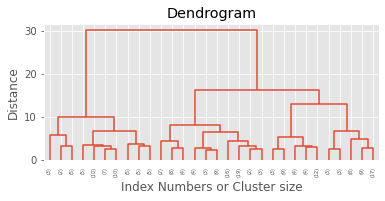

In [156]:
plt.figure(figsize=[6,2.5]); plt.title('Dendrogram'); plt.xlabel('Index Numbers or Cluster size');plt.ylabel('Distance')

dendrogram(Z,
           leaf_rotation=90., leaf_font_size=5.,  
           color_threshold=0, truncate_mode='lastp' )
plt.show()

### Matriz de comparación entre algoritmos de clustering

----

Usamos el método `confusion_matrix` de `scikit-learn` para construir esta matriz tomando los valores de los clusters predichos por k-means **como si fueran** los verdaderos valores de las etiquetas, y los valores de los clusters predichos por el clustering jerarquico **como si fueran** los predichos.

Pero no pierdan de vista que ésta no es la matriz de confusión que conocemos (porque este no es un problema de aprendizaje supervisado) aunque este método sirva para construir la matriz que compara los algoritmos de clustering.

In [157]:
from sklearn.metrics import confusion_matrix
confusion_cluster = confusion_matrix(labels_kmeans, labels_jerarquico)
print('K-means vs Jerárquico\n',confusion_cluster)

K-means vs Jerárquico
 [[58  0  5]
 [ 0 53  3]
 [12  4 64]]


<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://scikit-learn.org/stable/modules/clustering.html#clustering" target="_blank">Scikit-learn: clustering</a>

<a href="https://sites.google.com/site/adol7387pleci15/amseen729camdon1419" target="_blank">Introduction to Machine Learning with Python. Andreas C. Müller & Sarah Guido
</a>

<a href="https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a" target="_blank">Unsupervised learning and data clustering</a>

<a href="https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6" target="_blank">Clustering metrics better than the elbow method</a>

<a href="https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Selecting-a-Distance-Cut-Off-aka-Determining-the-Number-of-Clusters" target="_blank">Selecting a Distance Cut-Off aka Determining the Number of Clusters</a>

<a href="https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556" target="_blank">DBSCAN clustering - explained</a>
